## What Makes a Heartstone Card Legendary

##### Load the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# card attributes
file = open('header.txt', 'r')
header = file.read().splitlines()
file.close()

# Read csv into dataframe
dataset = pd.read_csv('cards.csv', delimiter=';', names=header, header=0)

##### Clean the data

In [3]:
def remove_attribute(attribute):
    del dataset[attribute]
    header.remove(attribute)

In [4]:
# Delete extra attributes
remove_attribute('cardId')
remove_attribute('dbfId')
remove_attribute('name')
remove_attribute('img')
remove_attribute('imgGold')
remove_attribute('artist')
remove_attribute('flavor')
remove_attribute('multiClassGroup')
remove_attribute('classes')
remove_attribute('mechanics')
remove_attribute('elite')
remove_attribute('faction')
remove_attribute('locale')
# All the card sets (except the Classic set) have the same distribution of legendary cards
remove_attribute('cardSet')
# The fact that there is or not a constraint on obtaining the card can bias the model
remove_attribute('howToGet')
remove_attribute('howToGetGold')

# Removed now but maybe useful in later works
remove_attribute('text')

In [5]:
dataset.head()

,rarity,type,playerClass,health,collectible,attack,race,cost,durability,armor,...,Adapt,Quest,Recruit,Rush,Echo,Magnetic,Overkill,Twinspell,Reborn,number mechanics
0,Free,Spell,Shaman,0.0,True,0.0,None,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1.0
1,Free,Minion,Neutral,1.0,False,1.0,None,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0.0
2,Free,Spell,Rogue,0.0,True,0.0,None,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0.0
3,Free,Spell,Warlock,0.0,False,0.0,None,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0.0
4,Free,Spell,Shaman,0.0,False,0.0,None,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1.0


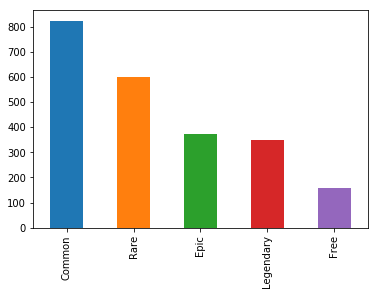

In [6]:
dataset['rarity'].value_counts().plot(kind='bar')

##### Prepare the data

In [7]:
# Values to change
rarities = ['Legendary', 'Free', 'Common', 'Epic', 'Rare']
types = ['Spell', 'Minion', 'Weapon', 'Hero Power', 'Hero']
playerClasses = ['Neutral', 'Shaman', 'Rogue', 'Warlock', 'Druid', 'Mage', 'Hunter', 'Paladin', 'Warrior', 'Priest', 'Whizbang']
races = ['None', 'Beast', 'Murloc', 'Totem', 'Mech', 'Demon', 'Elemental', 'Pirate', 'Dragon', 'All']

In [8]:
# 1 if legendary, 0 otherwise
for index in range(1, len(rarities)):
    dataset = dataset.replace([rarities[index]], 0)
dataset = dataset.replace('Legendary', 1)

for index in range(len(types)):
    dataset = dataset.replace([types[index]], index)
    
# 0 if neutral, 1 otherwise
for index in range(1, len(playerClasses)):
    dataset = dataset.replace([playerClasses[index]], 1)
dataset = dataset.replace('Neutral', 0)

for index in range(len(races)):
    dataset = dataset.replace([races[index]], index)

In [9]:
dataset.head()

,rarity,type,playerClass,health,collectible,attack,race,cost,durability,armor,...,Adapt,Quest,Recruit,Rush,Echo,Magnetic,Overkill,Twinspell,Reborn,number mechanics
0,0,0,1,0.0,True,0.0,0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1.0
1,0,1,0,1.0,False,1.0,0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0.0
2,0,0,1,0.0,True,0.0,0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0.0
3,0,0,1,0.0,False,0.0,0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0.0
4,0,0,1,0.0,False,0.0,0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1.0


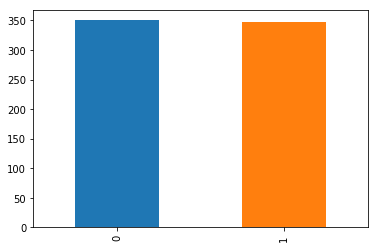

In [10]:
# Balance the data - There are too few Legendary cards
dataset = dataset.sample(frac=1, random_state=4)
legendary_cards = dataset.loc[dataset['rarity'] == 1]
non_legendary_cards = dataset.loc[dataset['rarity'] == 0].sample(n=350, random_state=42)
dataset = pd.concat([legendary_cards, non_legendary_cards])
dataset = dataset.sample(frac=1, random_state=4)

dataset['rarity'].value_counts().plot(kind='bar')

##### Train the Model

In [11]:
# Split data and labels
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

# Split training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

##### Variable Importance

No handles with labels found to put in legend.


Accuracy: 0.7357142857142858
Precision: 0.6666666666666666
Recall: 0.7868852459016393
cost                    0.221970
health                  0.168987
attack                  0.157834
race                    0.058707
number mechanics        0.056381
Quest                   0.045572
type                    0.044209
playerClass             0.034402
Battlecry               0.024284
Deathrattle             0.020006
Taunt                   0.017334
Aura                    0.014698
collectible             0.012297
Combo                   0.010871
Stealth                 0.010036
Discover                0.010028
Divine Shield           0.008042
durability              0.007909
armor                   0.007429
Secret                  0.007293
Rush                    0.006940
Lifesteal               0.006786
Magnetic                0.005867
Overload                0.005303
Spell Damage            0.004799
Windfury                0.004607
InvisibleDeathrattle    0.004503
Charge                 

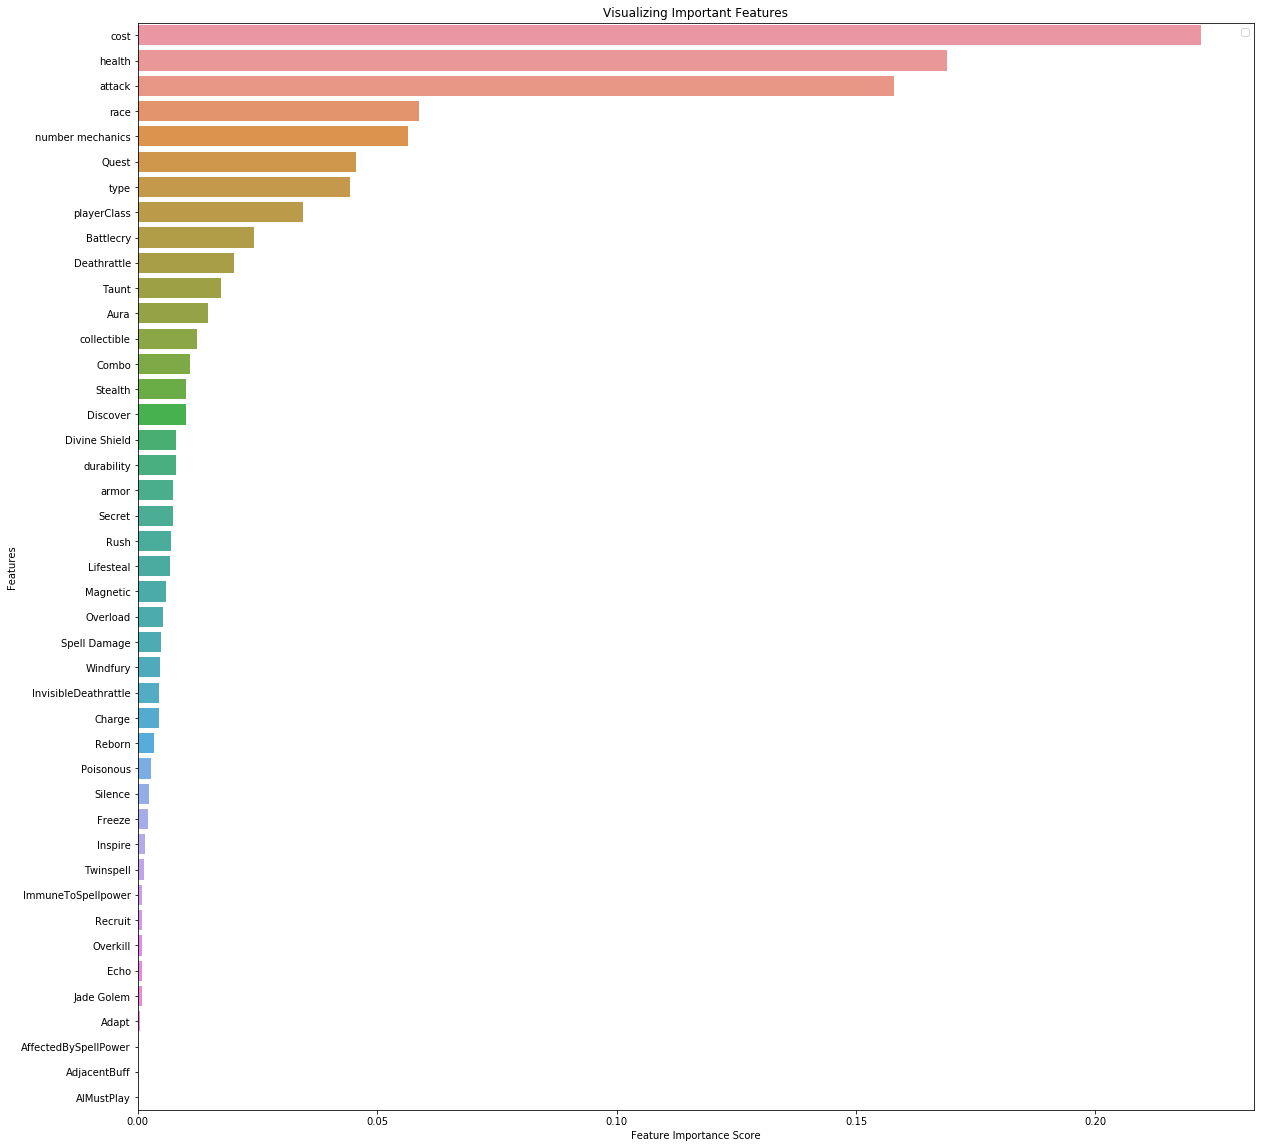

In [15]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

feature_imp = pd.Series(rf.feature_importances_,index=header[1:]).sort_values(ascending=False)

print(feature_imp)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.rcParams["figure.figsize"] = [20,20]
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()